Name: Jonathan Mazurkiewicz <BR>
Z#: Z23641903 <br>
Link: https://colab.research.google.com/drive/1w3LAOgO6VDlgjrMX3PA1mM1NHywNnyCX?usp=sharing<br>
Assignment 6 <br>

NOTES: Pictures will not rotate. They are stored properly and I have tried multiple times. Please download to see in proper orientation. My apologies.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from random import randint


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Dropout, Flatten
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from keras.utils.vis_utils import plot_model, model_to_dot
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes = np.arange(10)

#Selecting 20% of training data for validation / shuffling data
num_train_img = x_train.shape[0]
train_ind = np.arange(0,num_train_img)
train_ind_shuffled = np.random.permutation(train_ind)
x_train = x_train[train_ind_shuffled, :, :, :]
y_train = y_train[train_ind_shuffled]


x_val = x_train[0:int(.2*num_train_img), :, :, :]
y_val = y_train[0:int(.2*num_train_img), :]

x_train = x_train[int(.2*num_train_img):, :, :]
y_train = y_train[int(.2*num_train_img):]


#Pixel scaling
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

#Class => binary class matrices

y_train_c = to_categorical(y_train, len(classes))
y_val_c = to_categorical(y_val, len(classes))
y_test_c = to_categorical(y_test, len(classes))

print(x_train.shape)
print (x_val.shape)
print (x_test.shape)
print (y_train_c.shape)
print (y_val_c.shape)
print (y_test_c.shape)
print (type(x_train))

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 10)
(10000, 10)
(10000, 10)
<class 'numpy.ndarray'>


In [ ]:
#Define model -- (2 conv + 1 pool) x 2 => flatten => FC => output
#FC has 512 nodes. filter size 3x3ximg_depth
#32 filters in conv block 1, 64 conv block 2

model_a = Sequential()
#Conv Block 1 (32 layers + maxPool, 3x3 filters)
model_a.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape = x_train.shape[1:]))
model_a.add(Activation('relu'))
model_a.add(Conv2D(filters=32, kernel_size=(3, 3), padding = 'same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size = (2, 2)))

#Conv Block 2 (64 layers + maxPool, 3x3 filters)
model_a.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, kernel_size = (3, 3), padding = 'same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size = (2, 2)))

#Flatten layer
model_a.add(Flatten())

#FC Layer - 512 neurons / Output layer - 10 neurons (softmax)
model_a.add(Dense(units = 512, activation = 'relu'))
model_a.add(Dense(units=len(classes), activation = 'softmax'))


plot_model(model_a, to_file= 'model cnn.png')

In [ ]:
#Compile the model
opt = tf.keras.optimizers.Adam(learning_rate = .001)
model_a.compile(loss= 'categorical_crossentropy',
                optimizer= opt,
                metrics = ['accuracy'])

save_path = '/content/drive/MyDrive/CHECKPOINT'
callbacks_save = ModelCheckpoint(save_path, monitor = 'val_loss', verbose = 0, save_best_only=True, save_freq = 'epoch')

history = model_a.fit(x_train, y_train_c,
                      batch_size = 32,
                      epochs = 50,
                      verbose = 1,
                      validation_data = (x_val, y_val_c),
                      callbacks = [callbacks_save])

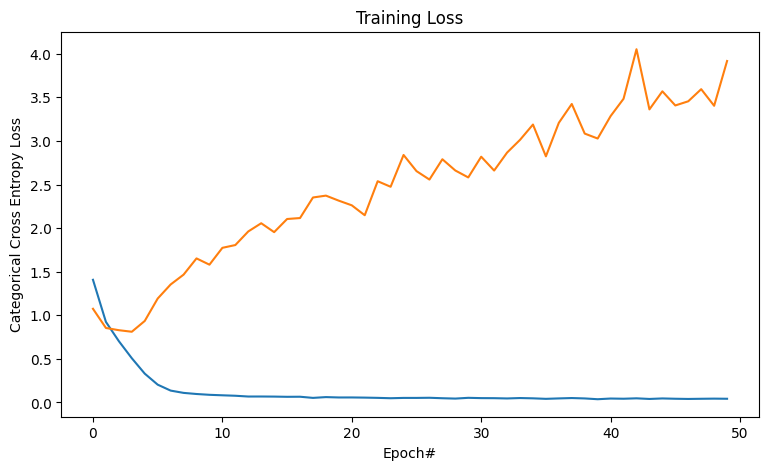

313/313 [==============================] - 2s 6ms/step - loss: 0.8344 - accuracy: 0.7250
Total Loss on the testing set:  0.8344312310218811
313/313 [==============================] - 2s 6ms/step - loss: 0.8115 - accuracy: 0.7325
Total Loss on the validation set:  0.8114809393882751


In [ ]:
def plot_curve(train_loss, val_loss):
  epochs = np.arange(train_loss.shape[0])
  plt.plot(epochs, train_loss)
  plt.xlabel('Epoch#')
  plt.ylabel('Loss')
  plt.title('Training Loss')
  plt.plot(epochs,val_loss)
  plt.xlabel('Epoch#')
  plt.ylabel('Categorical Cross Entropy Loss')
  plt.title('Training Loss')

  plt.show()

plt.figure(figsize = [9,5])
train_loss_curve = np.array(history.history['loss'])
val_loss_curve = np.array(history.history['val_loss'])
plot_curve(train_loss_curve, val_loss_curve)

model_a = load_model(save_path)
score = model_a.evaluate(x_test, y_test_c)
print("Total Loss on the testing set: ", score[0])

score_val = model_a.evaluate(x_val, y_val_c)

print("Total Loss on the validation set: ", score_val[0])

In [ ]:
#Define model -- (2 conv + 1 pool) x 2 => flatten => FC => output
#FC has 512 nodes. filter size 3x3ximg_depth
#32 filters in conv block 1, 64 conv block 2

model_b = Sequential()
#Conv Block 1 (32 layers + maxPool, 3x3 filters)
model_b.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape = x_train.shape[1:]))
model_b.add(Activation('relu'))
model_b.add(Conv2D(filters=32, kernel_size=(3, 3), padding = 'same'))
model_b.add(Activation('relu'))
model_b.add(MaxPooling2D(pool_size = (2, 2)))

#Conv Block 2 (64 layers + maxPool, 3x3 filters)
model_b.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model_b.add(Activation('relu'))
model_b.add(Conv2D(64, kernel_size = (3, 3), padding = 'same'))
model_b.add(Activation('relu'))
model_b.add(MaxPooling2D(pool_size = (2, 2)))

#Flatten layer
model_b.add(Flatten())

#FC Layer - 512 neurons / Output layer - 10 neurons (softmax)
model_b.add(Dense(units = 512, activation = 'relu'))
model_b.add(Dense(units=len(classes), activation = 'softmax'))


plot_model(model_b, to_file= 'model cnn.png')

In [ ]:
datagen = ImageDataGenerator(

    rotation_range = 10,
    width_shift_range = .1,
    height_shift_range = .1,
    horizontal_flip = True
)
opt = tf.keras.optimizers.Adam(learning_rate = .001)
model_b.compile(loss= 'categorical_crossentropy',
                optimizer= opt,
                metrics = ['accuracy'])

save_path = '/content/drive/MyDrive/CHECKPOINT'
callbacks_save = ModelCheckpoint(save_path, monitor = 'val_loss', verbose = 0, save_best_only=True, save_freq = 'epoch')

datagen.fit(x_train)

history = model_b.fit(datagen.flow(x_train, y_train_c, batch_size = 16), steps_per_epoch = len(x_train) / 16,
                      batch_size = 32,
                      epochs = 50,
                      verbose = 1,
                      validation_data = (x_val, y_val_c),
                      callbacks = [callbacks_save])

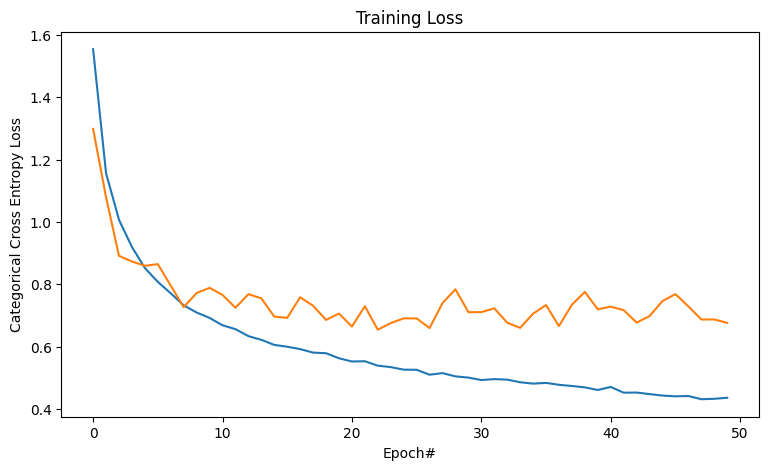

313/313 [==============================] - 2s 4ms/step - loss: 0.6809 - accuracy: 0.7846
Total Loss on the testing set:  0.6808840036392212
313/313 [==============================] - 1s 3ms/step - loss: 0.6546 - accuracy: 0.7867
Total Loss on the validation set:  0.6545953750610352


In [ ]:
plt.figure(figsize = [9,5])
train_loss_curve = np.array(history.history['loss'])
val_loss_curve = np.array(history.history['val_loss'])
plot_curve(train_loss_curve, val_loss_curve)

model_b = load_model(save_path)
score = model_b.evaluate(x_test, y_test_c)
print("Total Loss on the testing set: ", score[0])

score_val = model_b.evaluate(x_val, y_val_c)

print("Total Loss on the validation set: ", score_val[0])
















PART G:

With the first model (no data augmentation), the model is overfitted very rapidly, shown by the increase in validation loss but without an increase in validation accuracy.

With the second model, overfitting is greatly reduced or nullified by adding in data augmentation. With a greater quantity of training data, the model is more easily able to generalize patterns instead of overfitting to the specific training data, resulting in a higher validation accuracy.

In [ ]:
#Define model -- (2 conv + 1 pool) x 2 => flatten => FC => output
#FC has 512 nodes. filter size 3x3ximg_depth
#32 filters in conv block 1, 64 conv block 2


from keras.layers import BatchNormalization
model_c = Sequential()
#Conv Block 1 (32 layers + maxPool, 3x3 filters)
model_c.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape = x_train.shape[1:]))
model_c.add(BatchNormalization())
model_c.add(Activation('relu'))
model_c.add(Conv2D(filters=32, kernel_size=(3, 3), padding = 'same'))
model_c.add(BatchNormalization())
model_c.add(Activation('relu'))
model_c.add(MaxPooling2D(pool_size = (2, 2)))

#Conv Block 2 (64 layers + maxPool, 3x3 filters)
model_c.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model_c.add(BatchNormalization())
model_c.add(Activation('relu'))
model_c.add(Conv2D(64, kernel_size = (3, 3), padding = 'same'))
model_c.add(BatchNormalization())
model_c.add(Activation('relu'))
model_c.add(MaxPooling2D(pool_size = (2, 2)))

#Flatten layer
model_c.add(Flatten())

#FC Layer - 512 neurons / Output layer - 10 neurons (softmax)
model_c.add(Dense(units = 512, activation = 'relu'))
model_c.add(BatchNormalization())
model_c.add(Dense(units=len(classes), activation = 'softmax'))


plot_model(model_c, to_file= 'model cnn.png')

In [ ]:
#Compile the model
opt = tf.keras.optimizers.Adam(learning_rate = .01)
model_c.compile(loss= 'categorical_crossentropy',
                optimizer= opt,
                metrics = ['accuracy'])

save_path = '/content/drive/MyDrive/CHECKPOINT3'
callbacks_save = ModelCheckpoint(save_path, monitor = 'val_loss', verbose = 0, save_best_only=True, save_freq = 'epoch')

history3 = model_c.fit(x_train, y_train_c,
                      batch_size = 64,
                      epochs = 50,
                      verbose = 1,
                      validation_data = (x_val, y_val_c),
                      callbacks = [callbacks_save])

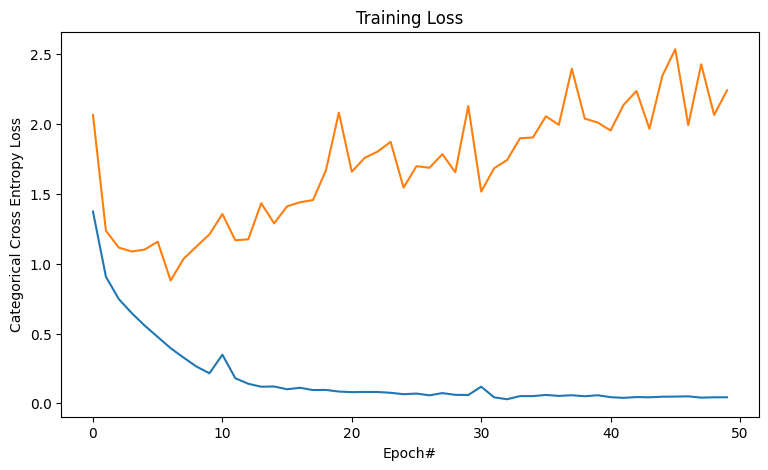

313/313 [==============================] - 3s 6ms/step - loss: 0.8750 - accuracy: 0.7450
Total Loss on the testing set:  0.8749573230743408
313/313 [==============================] - 2s 5ms/step - loss: 0.8795 - accuracy: 0.7413
Total Loss on the validation set:  0.8794529438018799


In [ ]:
plt.figure(figsize = [9,5])
train_loss_curve = np.array(history3.history['loss'])
val_loss_curve = np.array(history3.history['val_loss'])
plot_curve(train_loss_curve, val_loss_curve)

model_c = load_model(save_path)
score = model_c.evaluate(x_test, y_test_c)
print("Total Loss on the testing set: ", score[0])

score_val = model_c.evaluate(x_val, y_val_c)

print("Total Loss on the validation set: ", score_val[0])

Part I:

The training loss for the first model decreased slowly and steadily over 50 iterations.

The training loss for the third model converged much faster, due to the 10x higher learning rate.

By adding a normalization layer, a much greater learning rate was able to be used while reducing the degree of overfitting.